In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from model.util import AdjacencyMat
import data

In [61]:
table = pd.read_csv(data.source_dir_wsl + data.CITY + '.csv')
start_point = table[table['TYPE'] == 'Public_Health_Departments']

start_coord = start_point.loc[:, ['X', 'Y']].to_numpy()
demand_coords = table.loc[:, ['X', 'Y']].to_numpy()

In [62]:
AdjacencyMat.from_fully_connected(demand_coords)

array([[        inf,  6.31206394, 10.21884925, ...,  3.03851276,
        10.24435444,  1.88162927],
       [ 6.31206394,         inf,  4.00391381, ...,  3.53311913,
         4.01575507,  5.48768467],
       [10.21884925,  4.00391381,         inf, ...,  7.5366228 ,
         0.08443149,  9.4915491 ],
       ...,
       [ 3.03851276,  3.53311913,  7.5366228 , ...,         inf,
         7.5488742 ,  1.95829561],
       [10.24435444,  4.01575507,  0.08443149, ...,  7.5488742 ,
                inf,  9.50257054],
       [ 1.88162927,  5.48768467,  9.4915491 , ...,  1.95829561,
         9.50257054,         inf]])

In [6]:
_ = pd.read_csv('./log/2024-01-03-09-35-28/best_log.csv', header=None, names=['num_iter','duration(s)','num_illegal','space_violation','demand_violation','fitness','num_total_iter', 'num_particle', 'num_station', 'distance_limit', 'omega', 'phi'])
_ = _.drop(_.index[-1], axis=0)
_['num_total_iter'] = _['num_total_iter'].apply(lambda row: row.lstrip('['))
_['phi'] = _['phi'].apply(lambda row: row.rstrip(']'))
_

,num_iter,duration(s),num_illegal,space_violation,demand_violation,fitness,num_total_iter,num_particle,num_station,distance_limit,omega,phi
0,0.0,NaN,0.0,0.0,0.0,4.641466,10000,30.0,5.0,40.0,0.4,2
1,0.0,NaN,0.0,0.0,0.0,4.627541,10000,30.0,5.0,40.0,0.5,2
2,0.0,NaN,0.0,0.0,0.0,4.734431,10000,30.0,5.0,40.0,0.7,2
3,0.0,NaN,0.0,0.0,0.0,4.659883,10000,30.0,5.0,40.0,0.6,2
4,0.0,NaN,0.0,0.0,0.0,4.935132,10000,30.0,5.0,40.0,0.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
54671,8199.0,NaN,0.0,0.0,0.0,0.184188,10000,30.0,5.0,40.0,0.4,2
54672,8236.0,NaN,0.0,0.0,0.0,0.075535,10000,30.0,5.0,40.0,0.5,2
54673,8236.0,NaN,0.0,0.0,0.0,0.553578,10000,30.0,5.0,40.0,0.6,2
54674,8237.0,NaN,0.0,0.0,0.0,0.075535,10000,30.0,5.0,40.0,0.5,2


In [7]:
best_pos = {}
for config, sub_table in _.groupby(by=['num_total_iter', 'num_particle', 'num_station', 'distance_limit', 'omega', 'phi']):
    best_pos[config] = sub_table.iloc[8200, :]

In [8]:
pd.DataFrame(best_pos).T

num_iter duration(s) num_illegal space_violation  \
10000 30.0 5.0 40.0 0.4  2   8200.0         NaN         0.0             0.0   
                    0.5  2   8200.0         NaN         0.0             0.0   
                    0.6  2   8200.0         NaN         0.0             0.0   
                    0.7  2   8200.0         NaN         0.0             0.0   
                    0.8  2   8200.0         NaN         0.0             0.0   
                    0.9  2   8200.0         NaN         0.0             0.0   

                           demand_violation   fitness num_total_iter  \
10000 30.0 5.0 40.0 0.4  2              0.0  0.184188          10000   
                    0.5  2              0.0  0.075535          10000   
                    0.6  2              0.0  0.553578          10000   
                    0.7  2              0.0  0.059574          10000   
                    0.8  2              0.0  0.246943          10000   
                    0.9  2              0.0  3.188762          10000   

                           num_particle num_station distance_limit omega phi  
10000 30.0 5.0 40.0 0.4  2         30.0         5.0           40.0   0.4   2  
                    0.5  2         30.0         5.0           40.0   0.5   2  
                    0.6  2         30.0         5.0           40.0   0.6   2  
                    0.7  2         30.0         5.0           40.0   0.7   2  
                    0.8  2         30.0         5.0           40.0   0.8   2  
                    0.9  2         30.0         5.0           40.0   0.9   2

In [9]:
best_pos_series = []
for config, sub_table in _.groupby(by=['num_total_iter', 'num_particle', 'num_station', 'distance_limit', 'omega', 'phi']):
    best_pos_series.append(sub_table.iloc[:8200, :].reset_index(drop=True))

In [10]:
best_pos_series[0]

,num_iter,duration(s),num_illegal,space_violation,demand_violation,fitness,num_total_iter,num_particle,num_station,distance_limit,omega,phi
0,0.0,NaN,0.0,0.0,0.0,4.641466,10000,30.0,5.0,40.0,0.4,2
1,1.0,NaN,0.0,0.0,0.0,4.482958,10000,30.0,5.0,40.0,0.4,2
2,2.0,NaN,0.0,0.0,0.0,4.482958,10000,30.0,5.0,40.0,0.4,2
3,3.0,NaN,0.0,0.0,0.0,4.126448,10000,30.0,5.0,40.0,0.4,2
4,4.0,NaN,0.0,0.0,0.0,4.126448,10000,30.0,5.0,40.0,0.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8195,8195.0,NaN,0.0,0.0,0.0,0.184188,10000,30.0,5.0,40.0,0.4,2
8196,8196.0,NaN,0.0,0.0,0.0,0.184188,10000,30.0,5.0,40.0,0.4,2
8197,8197.0,NaN,0.0,0.0,0.0,0.184188,10000,30.0,5.0,40.0,0.4,2
8198,8198.0,NaN,0.0,0.0,0.0,0.184188,10000,30.0,5.0,40.0,0.4,2


<Axes: >

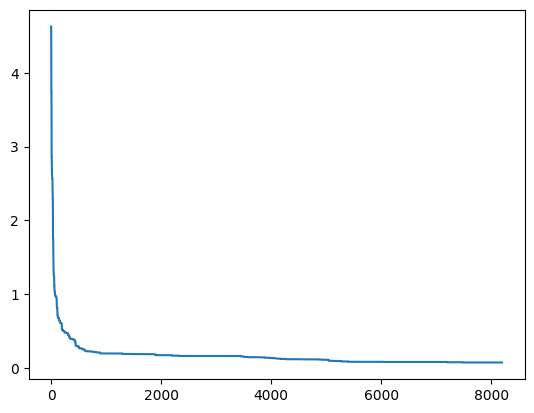

In [11]:
best_pos_series[1]['fitness'].plot()

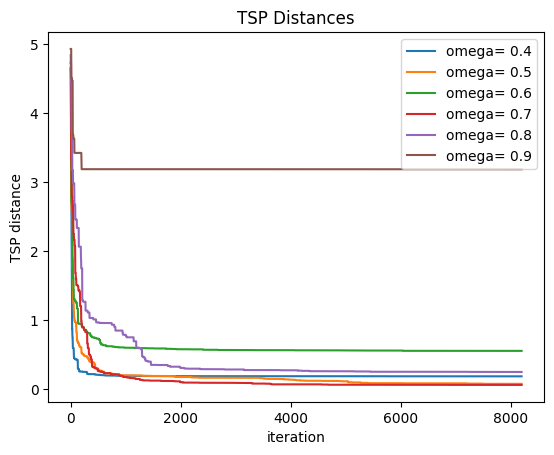

In [50]:
# 一张图展示所有配置的best pos fitness
plt.figure()
plt.title('TSP Distances')
plt.ylabel('TSP distance')
plt.xlabel('iteration')
for df in best_pos_series:
    omega = df.loc[0, 'omega']
    plt.plot(df['fitness'], label=f'omega={omega: .1f}')
plt.legend()
plt.savefig('./log/img/tsp dis with diff omega.png')

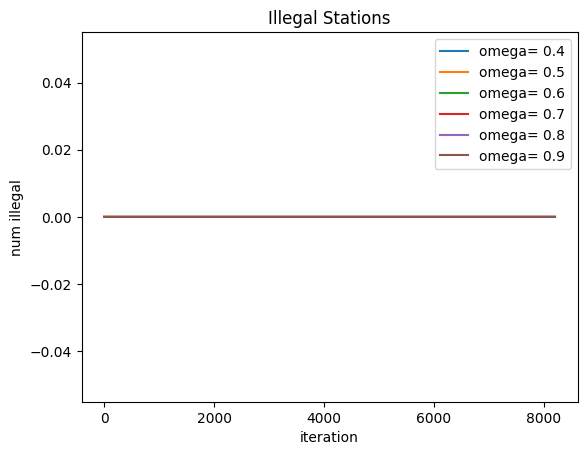

In [48]:
# 一张图展示所有配置的best pos fitness
plt.figure()
plt.title('Illegal Stations')
plt.ylabel('num illegal')
plt.xlabel('iteration')
for df in best_pos_series:
    omega = df.loc[0, 'omega']
    plt.plot(df['num_illegal'], label=f'omega={omega: .1f}')
plt.legend()
plt.savefig('./log/img/num illegal with diff omega.png')

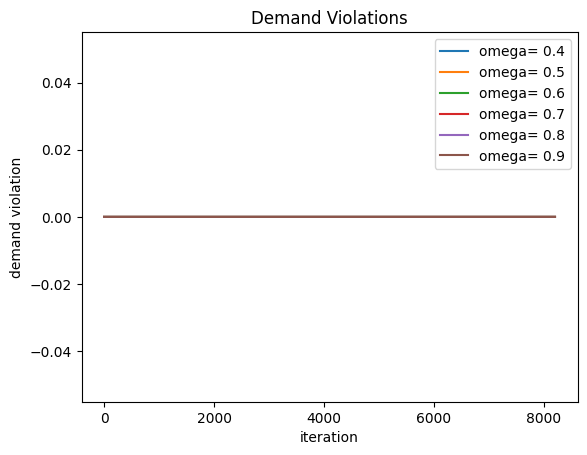

In [49]:
# 一张图展示所有配置的best pos fitness
plt.figure()
plt.title('Demand Violations')
plt.ylabel('demand violation')
plt.xlabel('iteration')
for df in best_pos_series:
    omega = df.loc[0, 'omega']
    plt.plot(df['demand_violation'], label=f'omega={omega: .1f}')
plt.legend()
plt.savefig('./log/img/demand violation with diff omega.png')

In [13]:
best_pos_series[1]

,num_iter,duration(s),num_illegal,space_violation,demand_violation,fitness,num_total_iter,num_particle,num_station,distance_limit,omega,phi
0,0.0,NaN,0.0,0.0,0.0,4.627541,10000,30.0,5.0,40.0,0.5,2
1,1.0,NaN,0.0,0.0,0.0,4.627541,10000,30.0,5.0,40.0,0.5,2
2,2.0,NaN,0.0,0.0,0.0,3.745777,10000,30.0,5.0,40.0,0.5,2
3,3.0,NaN,0.0,0.0,0.0,3.745777,10000,30.0,5.0,40.0,0.5,2
4,4.0,NaN,0.0,0.0,0.0,3.745777,10000,30.0,5.0,40.0,0.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8195,8195.0,NaN,0.0,0.0,0.0,0.075535,10000,30.0,5.0,40.0,0.5,2
8196,8196.0,NaN,0.0,0.0,0.0,0.075535,10000,30.0,5.0,40.0,0.5,2
8197,8197.0,NaN,0.0,0.0,0.0,0.075535,10000,30.0,5.0,40.0,0.5,2
8198,8198.0,NaN,0.0,0.0,0.0,0.075535,10000,30.0,5.0,40.0,0.5,2


# Test distance limit

In [21]:
best_log2 = pd.read_csv('./log/2024-01-04-14-44-40/best_log.csv', header=None, names=['num_iter','duration(s)','num_illegal','space_violation','demand_violation','fitness','num_total_iter', 'num_particle', 'num_station', 'distance_limit', 'omega', 'phi'])
best_log2 = best_log2.drop(best_log2.index[-1], axis=0)
best_log2['num_total_iter'] = best_log2['num_total_iter'].apply(lambda row: row.lstrip('['))
best_log2['phi'] = best_log2['phi'].apply(lambda row: row.rstrip(']'))
best_log2

,num_iter,duration(s),num_illegal,space_violation,demand_violation,fitness,num_total_iter,num_particle,num_station,distance_limit,omega,phi
0,0.0,NaN,0.0,0.0,186.0,9.509949,10000,30.0,5.0,1.0,0.7,2
1,0.0,NaN,0.0,0.0,61.0,14.737138,10000,30.0,5.0,4.0,0.7,2
2,0.0,NaN,0.0,0.0,16.0,23.399686,10000,30.0,5.0,7.0,0.7,2
3,0.0,NaN,0.0,0.0,0.0,16.947295,10000,30.0,5.0,10.0,0.7,2
4,1.0,NaN,0.0,0.0,186.0,9.509949,10000,30.0,5.0,1.0,0.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
74422,3844.0,NaN,0.0,0.0,0.0,0.046786,10000,30.0,5.0,19.0,0.7,2
74423,1893.0,NaN,0.0,0.0,0.0,0.709027,10000,30.0,5.0,37.0,0.7,2
74424,3819.0,NaN,0.0,0.0,0.0,0.046786,10000,30.0,5.0,31.0,0.7,2
74425,4146.0,NaN,0.0,0.0,0.0,1.399233,10000,30.0,5.0,16.0,0.7,2


In [30]:
best_log_series2 = [
    df.reset_index(drop=True)
    for config, df in best_log2.groupby(by=['num_total_iter', 'num_particle', 'num_station', 'distance_limit', 'omega', 'phi'])
]

In [26]:
[df.shape[0] for df in best_log_series2]

[10000,
 10000,
 10000,
 10000,
 5540,
 4147,
 3845,
 3821,
 3793,
 3753,
 3820,
 3814,
 1894]

In [28]:
best_log_series2[-1].iloc[:3000, :]

,num_iter,duration(s),num_illegal,space_violation,demand_violation,fitness,num_total_iter,num_particle,num_station,distance_limit,omega,phi
51177,0.0,NaN,0.0,0.0,0.0,8.601761,10000,30.0,5.0,37.0,0.7,2
51193,1.0,NaN,0.0,0.0,0.0,8.157528,10000,30.0,5.0,37.0,0.7,2
51214,2.0,NaN,0.0,0.0,0.0,7.802541,10000,30.0,5.0,37.0,0.7,2
51228,3.0,NaN,0.0,0.0,0.0,7.802541,10000,30.0,5.0,37.0,0.7,2
51244,4.0,NaN,0.0,0.0,0.0,7.802541,10000,30.0,5.0,37.0,0.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
74386,1889.0,NaN,0.0,0.0,0.0,0.709027,10000,30.0,5.0,37.0,0.7,2
74395,1890.0,NaN,0.0,0.0,0.0,0.709027,10000,30.0,5.0,37.0,0.7,2
74405,1891.0,NaN,0.0,0.0,0.0,0.709027,10000,30.0,5.0,37.0,0.7,2
74414,1892.0,NaN,0.0,0.0,0.0,0.709027,10000,30.0,5.0,37.0,0.7,2


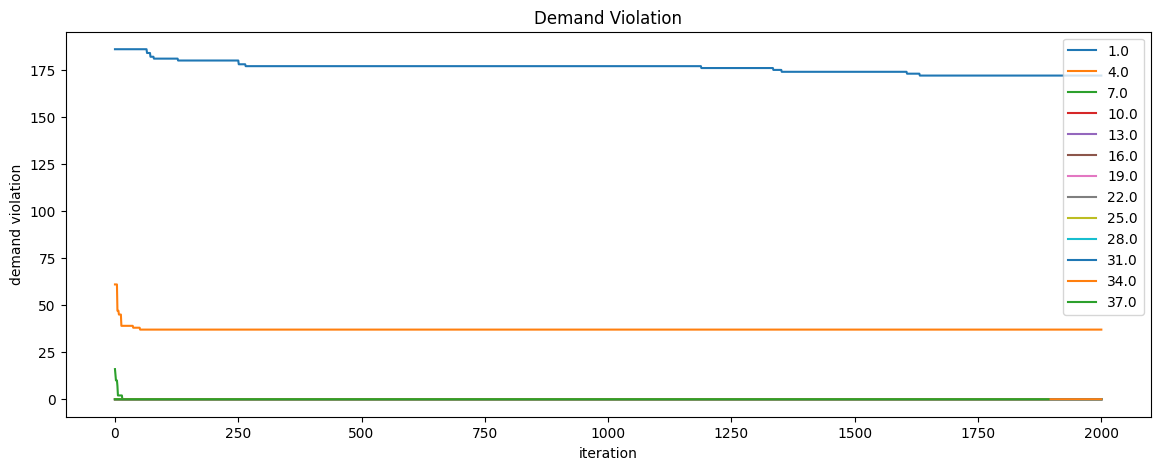

In [59]:
plt.figure(figsize=(14, 5))

plt.title('Demand Violation')
plt.xlabel('iteration')
plt.ylabel('demand violation')

for df in best_log_series2:
    distance_limit = df.loc[0, 'distance_limit']
    plt.plot(df.loc[:2000, 'demand_violation'], label=distance_limit)
    
plt.legend()
plt.savefig('./log/img/demand violation with diff distance limit.png')

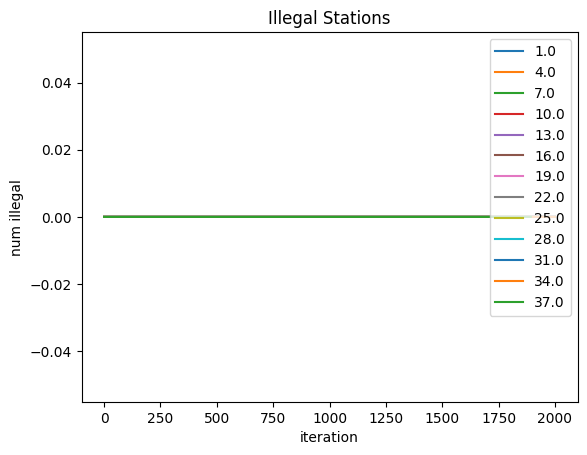

In [60]:
plt.figure()

plt.title('Illegal Stations')
plt.xlabel('iteration')
plt.ylabel('num illegal')

for df in best_log_series2:
    distance_limit = df.loc[0, 'distance_limit']
    plt.plot(df.loc[:2000, 'num_illegal'], label=distance_limit)
    
plt.legend()
plt.savefig('./log/img/num illegal with diff distance limit.png')

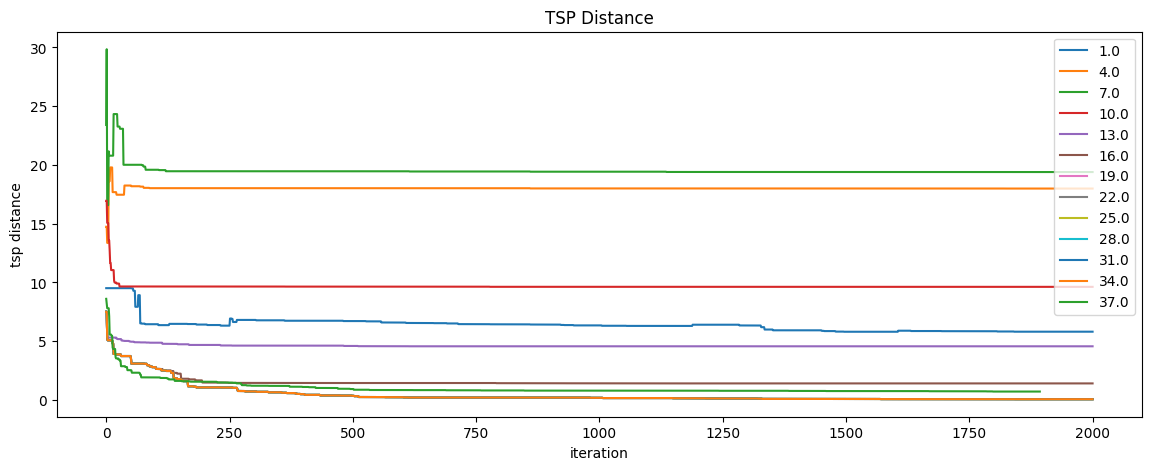

In [57]:
plt.figure(figsize=(14, 5))

plt.title('TSP Distance')
plt.xlabel('iteration')
plt.ylabel('tsp distance')

for df in best_log_series2:
    distance_limit = df.loc[0, 'distance_limit']
    plt.plot(df.loc[:2000, 'fitness'], label=distance_limit)
    
plt.legend()
plt.savefig('./log/img/tsp dis with diff distance limit.png')

# Test Num Station

In [63]:
best_log3 = pd.read_csv('./log/2024-01-05-09-30-51/best_log.csv', header=None, names=['num_iter','duration(s)','num_illegal','space_violation','demand_violation','fitness','num_total_iter', 'num_particle', 'num_station', 'distance_limit', 'omega', 'phi'])
best_log3 = best_log3.drop(best_log3.index[-1], axis=0)
best_log3['num_total_iter'] = best_log3['num_total_iter'].apply(lambda row: row.lstrip('['))
best_log3['phi'] = best_log3['phi'].apply(lambda row: row.rstrip(']'))
best_log3

,num_iter,duration(s),num_illegal,space_violation,demand_violation,fitness,num_total_iter,num_particle,num_station,distance_limit,omega,phi
0,0,NaN,0,0,17.0,16.901199,3000,30,4,7,0.7,2
1,0,NaN,0,0,2.0,24.273522,3000,30,5,7,0.7,2
2,1,NaN,0,0,17.0,16.901199,3000,30,4,7,0.7,2
3,2,NaN,0,0,5.0,21.050251,3000,30,4,7,0.7,2
4,3,NaN,0,0,5.0,21.050251,3000,30,4,7,0.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13185,831,NaN,0,0,0.0,17.062240,3000,30,8,7,0.7,2
13186,240,NaN,0,0,0.0,16.683261,3000,30,9,7,0.7,2
13187,832,NaN,0,0,0.0,17.062240,3000,30,8,7,0.7,2
13188,833,NaN,0,0,0.0,17.062240,3000,30,8,7,0.7,2


In [64]:
best_log_series3 = [
    df.reset_index(drop=True)
    for config, df in best_log3.groupby(by=['num_total_iter', 'num_particle', 'num_station', 'distance_limit', 'omega', 'phi'])
]

In [65]:
[df.shape[0] for df in best_log_series3]

[3000, 3000, 3000, 3000, 835, 241, 88, 21, 5]

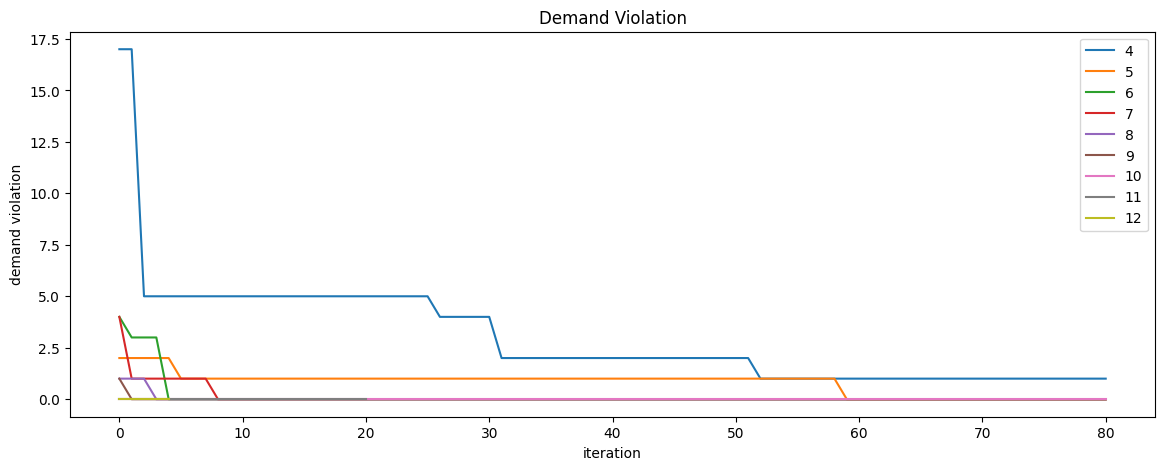

In [70]:
plt.figure(figsize=(14, 5))

plt.title('Demand Violation')
plt.xlabel('iteration')
plt.ylabel('demand violation')

for df in best_log_series3:
    distance_limit = df.loc[0, 'num_station']
    plt.plot(df.loc[:80, 'demand_violation'], label=distance_limit)
    
plt.legend()
plt.savefig('./log/img/demand violation with diff num station.png')

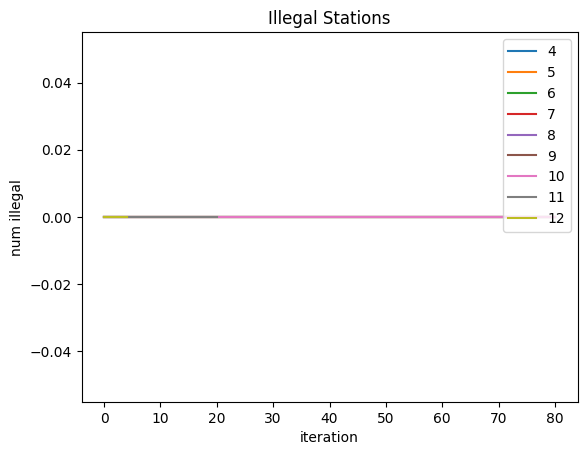

In [72]:
plt.figure()

plt.title('Illegal Stations')
plt.xlabel('iteration')
plt.ylabel('num illegal')

for df in best_log_series3:
    distance_limit = df.loc[0, 'num_station']
    plt.plot(df.loc[:80, 'num_illegal'], label=distance_limit)
    
plt.legend()
plt.savefig('./log/img/num illegal with diff num station.png')

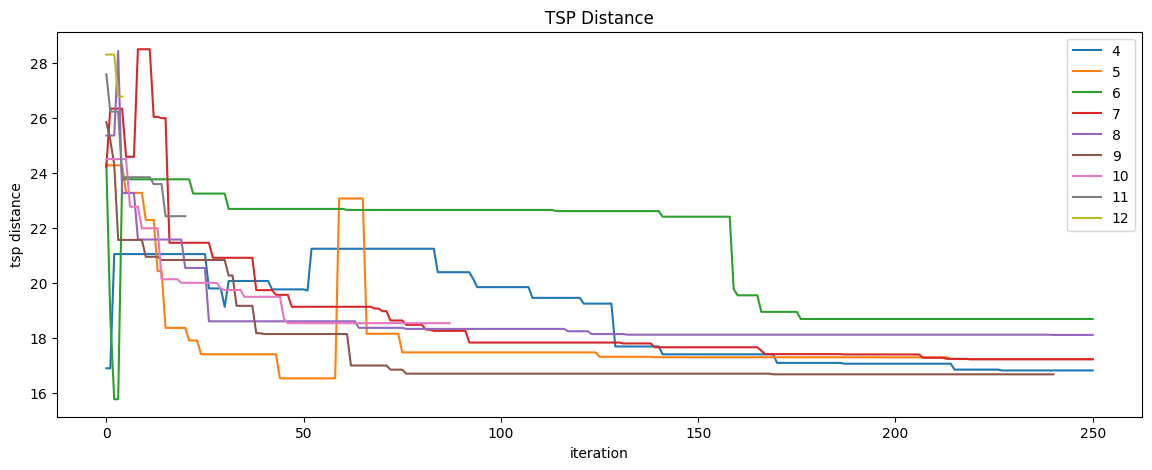

In [75]:
plt.figure(figsize=(14, 5))

plt.title('TSP Distance')
plt.xlabel('iteration')
plt.ylabel('tsp distance')

for df in best_log_series3:
    distance_limit = df.loc[0, 'num_station']
    plt.plot(df.loc[:250, 'fitness'], label=distance_limit)
    
plt.legend()
plt.savefig('./log/img/tsp dis with diff num station.png')